In [26]:
import numpy as np 
import pandas as pd 
import sys
import os 


In [27]:
from sklearn import datasets 
iris= datasets.load_iris()

In [28]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
X= pd.DataFrame(iris.data,columns=["Sepal Length","Sepal width","Petal Length","Petal width"])

In [30]:
y=pd.DataFrame(iris.target,columns=["Species"])
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [31]:
data = pd.concat([X,y],axis=1)
data.to_csv('iris.csv')

### Visuliza the data 

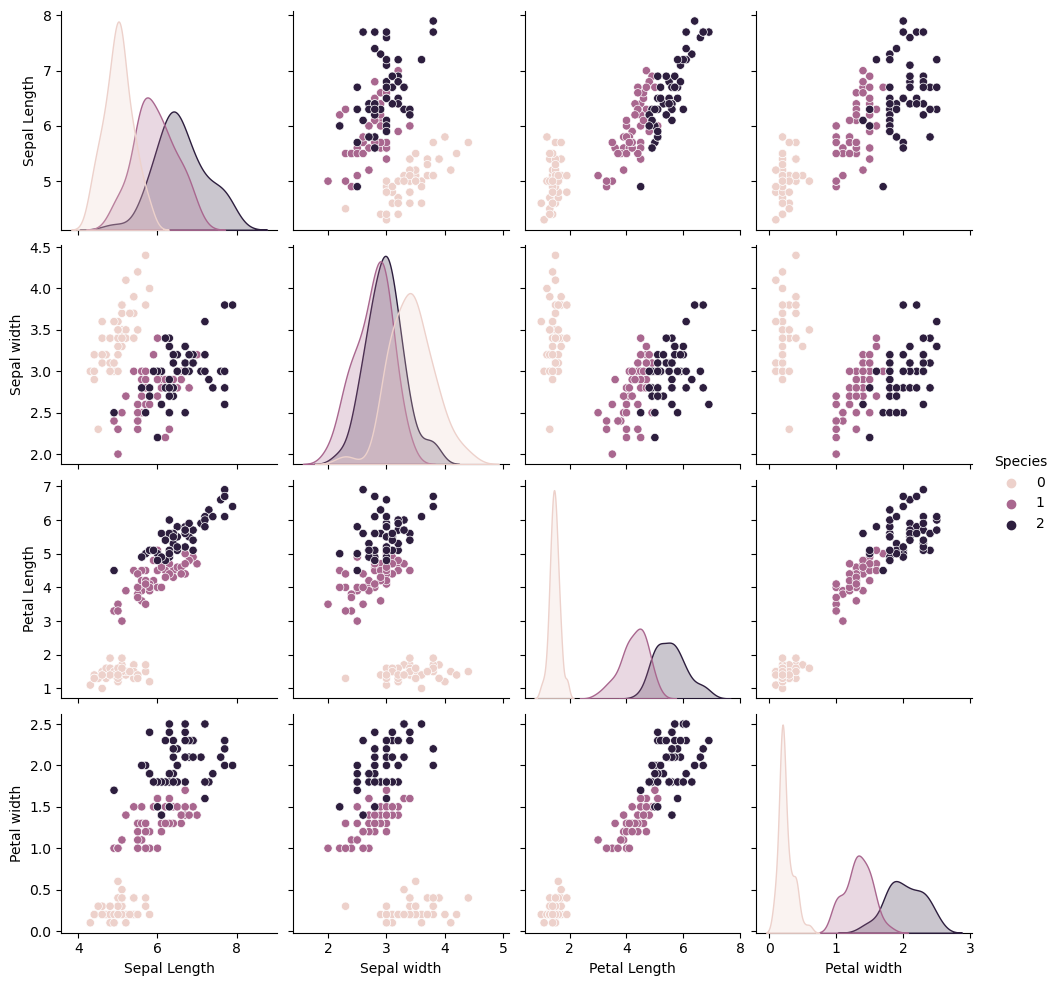

In [32]:
import seaborn as sns 
sns.pairplot(data,hue='Species')

In [33]:
optimized_data = data[data["Species"]!=0][["Sepal Length","Sepal width","Species"]]
optimized_data


,Sepal Length,Sepal width,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


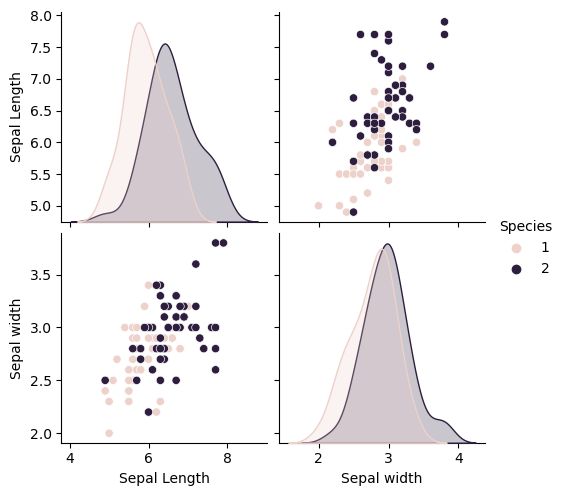

In [35]:
sns.pairplot(optimized_data,hue="Species")

In [37]:
optimized_data.shape

(100, 3)

In [39]:
X=optimized_data.iloc[:,0:2]
y=optimized_data.iloc[:,-1]

In [41]:
X

,Sepal Length,Sepal width
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
53,5.5,2.3
54,6.5,2.8
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [42]:
y

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 100, dtype: int32

### Since voting classifier is heterogenous , we have to use different algorithms 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
from sklearn.model_selection import cross_val_score

####  cross_val_score(estimator=model , X.y: target and independant column, cv=validation accross the data )

In [47]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()


In [52]:
estimators = [('LOG',clf1),('DT',clf2),('KNN',clf3)]

In [53]:
estimators[0]

('LOG', LogisticRegression())

In [54]:
estimators[1]

('DT', DecisionTreeClassifier())

In [55]:
estimators[2]

('KNN', KNeighborsClassifier())

### We are calculating the cross validation score==> accuracy

In [76]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2)*100)

LOG 75.0
DT 54.0
KNN 62.0


### Now we have to do the ensemble learning : **VOTING** classifier

### 1. Hard voting classifier

In [65]:
from sklearn.ensemble import VotingClassifier

In [66]:
estimators = [('LOG',clf1),('DT',clf2),('KNN',clf3)]

In [70]:
model1 = VotingClassifier(estimators=estimators,voting='hard')
model1

VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier())])

In [77]:
h_acc = cross_val_score(model1,X,y,cv=10,scoring='accuracy')

In [78]:
np.round(np.mean(h_acc),2)*100

66.0

### 2. Soft Voting Classifier

In [79]:
model2 = VotingClassifier(estimators=estimators,voting='soft')
model2

VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

In [81]:
s_acc = cross_val_score(model2,X,y,cv=10,scoring='accuracy')

In [82]:
np.round(np.mean(s_acc),2)*100

61.0

In [83]:
### agenda of the sat class
# weigted voting
# our own homo voting class
# extension of voting classiifer stacking
# bagging techniques RandomForest

# practical of everyhting with clear cut understanding and logic